In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('housing.csv')

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df=data.copy()

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [55]:
df.total_bedrooms.isnull().sum()/len(df)

0.01002906976744186

In [49]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_6864\1492108467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_bedrooms)


<Axes: xlabel='total_bedrooms', ylabel='Density'>

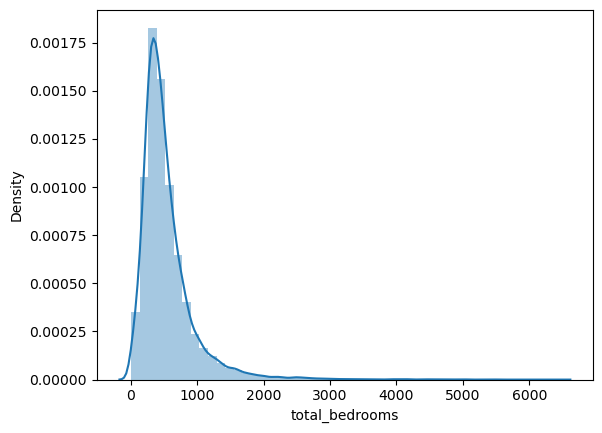

In [57]:
sns.distplot(df.total_bedrooms)

In [59]:
df.total_bedrooms.fillna(df.total_bedrooms.median(skipna=True),inplace=True)

In [61]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [63]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

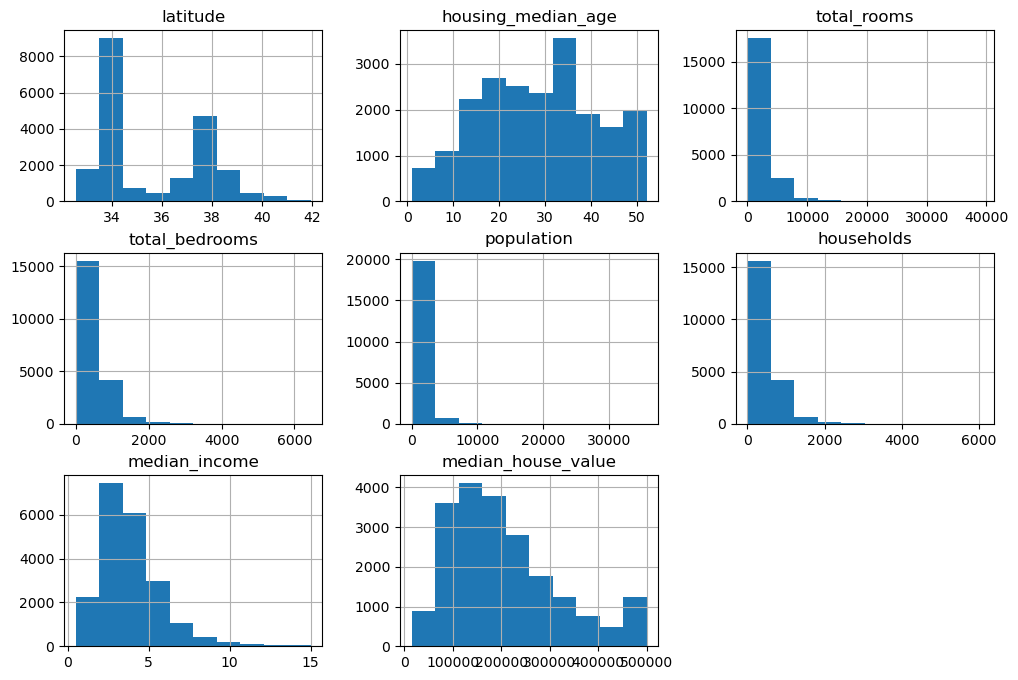

In [75]:
df.hist(column=df.columns,figsize=(12,8))

In [79]:
X=df.drop('median_house_value',axis=1)

In [81]:
y=df['median_house_value']

In [91]:
X.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [97]:
X['ocean_proximity']=X['ocean_proximity'].map({'<1H OCEAN':'<1h_ocean','INLAND':'ınland','NEAR OCEAN':'near_ocean','NEAR BAY':'near_bay'})

In [99]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,near_bay


In [105]:
X=pd.get_dummies(data=X,columns=['ocean_proximity'])

In [107]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1h_ocean,ocean_proximity_near_bay,ocean_proximity_near_ocean,ocean_proximity_ınland
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,True,False,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,True,False,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,True,False,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,True,False,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,True,False,False


In [109]:
bool_column=X.select_dtypes(include=["bool"]).columns
X[bool_column]=X[bool_column].astype(int)

In [111]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1h_ocean,ocean_proximity_near_bay,ocean_proximity_near_ocean,ocean_proximity_ınland
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,1,0,0


In [113]:
cols=X.columns

In [115]:
from sklearn.preprocessing import MinMaxScaler


In [117]:
scaler=MinMaxScaler()

In [123]:
X=scaler.fit_transform(X)

In [127]:
X=pd.DataFrame(data=X,columns=cols)

In [129]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1h_ocean,ocean_proximity_near_bay,ocean_proximity_near_ocean,ocean_proximity_ınland
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,1.0,0.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,1.0,0.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,1.0,0.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,1.0,0.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,1.0,0.0,0.0


In [131]:
from sklearn.model_selection import train_test_split

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rfc_rg=RandomForestRegressor(n_estimators=400,max_depth=6)

In [190]:
rfc_rg.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=400)

In [192]:
rfc_pred=rfc_rg.predict(X_test)

In [226]:
from sklearn.metrics import mean_squared_error,accuracy_score,root_mean_squared_error,r2_score

In [196]:
mse=mean_squared_error(y_test,rfc_pred)

In [198]:
rmse=np.sqrt(mse)

In [200]:
rmse

64935.18195886272

In [204]:
data.median_house_value.mean()

206855.81690891474

In [206]:
from sklearn.linear_model import LinearRegression

In [208]:
lr=LinearRegression()

In [210]:
lr.fit(X_train,y_train)

LinearRegression()

In [212]:
y_pred_1=lr.predict(X_test)

In [224]:
root_mean_squared_error(y_test,y_pred_1)

70060.52184473518

In [228]:
r2_score(y_test,y_pred_1)

0.6254240620553606